# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# (Making sure) Set backend as tensorflow
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


# Dataset
Keras has helper functions to setup the MNIST dataset. Let us create the train and test split.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print "X_train:", X_train.shape, "y_train:", y_train.shape
print "X_test :", X_test.shape, "y_test :", y_test.shape

X_train: (60000, 28, 28) y_train: (60000,)
X_test : (10000, 28, 28) y_test : (10000,)


# Re-format Input
Let us reshape the data into TensorFlow friendly format: (batch_size, num_rows, num_cols, num_channels)

In [3]:
num_rows = 28
num_cols = 28
num_channels = 1
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], num_rows, num_cols, num_channels).astype(np.float32) / 255
X_test = X_test.reshape(X_test.shape[0], num_rows, num_cols, num_channels).astype(np.float32) / 255

print "X_train:", X_train.shape, "X_test:", X_test.shape

X_train: (60000, 28, 28, 1) X_test: (10000, 28, 28, 1)


# Re-format Output
The output is classification among ten classes [0..9]. 

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print "y_train:", y_train.shape, "y_test:", y_test.shape

y_train: (60000, 10) y_test: (10000, 10)


# Visualize the data

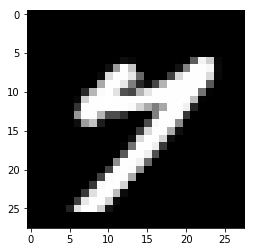

Label: 7


In [5]:
im = X_train[1001,:,:,0]
plt.imshow(im,cmap='gray')
plt.show()

print 'Label:',np.nonzero(y_train[1001,:])[0][0]

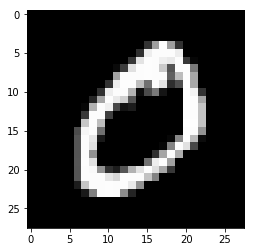

Label: 3


In [15]:
im = X_train[1,:,:,0]
plt.imshow(im,cmap='gray')
plt.show()

print 'Label:',np.nonzero(y_train[5036,:])[0][0]

# Build the model

In [7]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         8320      
__________

# Train the model

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 36s - loss: 0.6229 - acc: 0.7940 - val_loss: 0.1398 - val_acc: 0.9584
Epoch 2/10
 - 35s - loss: 0.1914 - acc: 0.9397 - val_loss: 0.0786 - val_acc: 0.9765
Epoch 3/10
 - 35s - loss: 0.1379 - acc: 0.9568 - val_loss: 0.0611 - val_acc: 0.9819
Epoch 4/10
 - 35s - loss: 0.1137 - acc: 0.9643 - val_loss: 0.0547 - val_acc: 0.9839
Epoch 5/10
 - 35s - loss: 0.0976 - acc: 0.9698 - val_loss: 0.0439 - val_acc: 0.9881
Epoch 6/10
 - 35s - loss: 0.0844 - acc: 0.9727 - val_loss: 0.0408 - val_acc: 0.9882
Epoch 7/10
 - 35s - loss: 0.0778 - acc: 0.9752 - val_loss: 0.0363 - val_acc: 0.9899
Epoch 8/10
 - 35s - loss: 0.0720 - acc: 0.9768 - val_loss: 0.0349 - val_acc: 0.9901
Epoch 9/10
 - 35s - loss: 0.0669 - acc: 0.9792 - val_loss: 0.0318 - val_acc: 0.9905
Epoch 10/10
 - 35s - loss: 0.0638 - acc: 0.9798 - val_loss: 0.0325 - val_acc: 0.9910


# Remove Dropouts for Inference

In [10]:
for k in model.layers:
    if type(k) is keras.layers.Dropout:
        model.layers.remove(k)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         8320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [12]:
# Save the model
model.save('mnistCNN.h5')
print('mnistCNN.h5 saved')

mnistCNN.h5 saved


# Convert

In [14]:
import coremltools

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
scale = 1/255.
coreml_model = coremltools.converters.keras.convert('./mnistCNN.h5',
                                                   input_names='image',
                                                   image_input_names='image',
                                                   output_names='output',
                                                   class_labels=output_labels,
                                                   image_scale=scale)

coreml_model.author = 'iOSDevLog'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify hand written digit'

coreml_model.input_description['image'] = 'Grayscale image of hand written digit'
coreml_model.output_description['output'] = 'Predicted digit'

coreml_model.save('mnistCNN.mlmodel')
print('mnistCNN.mlmodel saved')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x1167ecc90>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1167ec6d0>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x12e7413d0>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x1167ec590>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1167ec390>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x12e4d38d0>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x1167ece50>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x116a3b790>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x12e4d3b10>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x11681f490>
10 : flatten_1, <keras.layers.core.Flatten object at 0x116a53f50>
11 : dense_1, <keras.layers.core.Dense object at 0x12e43d7d0>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0x12e4d37d0>
13 : dense_2, <ker